<a href="https://colab.research.google.com/github/katyk20/distance-education-highered/blob/main/Notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
! git clone https://github.com/katyk20/distance-education-highered

Cloning into 'distance-education-highered'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 81 (delta 35), reused 13 (delta 4), pack-reused 0
Receiving objects: 100% (81/81), 557.41 KiB | 8.32 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [31]:
%cd /content/distance-education-highered
!git pull

/content/distance-education-highered
Already up to date.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [5]:
#read in depprograms18_22
enroll=pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/dist_enrollment18_22.csv')

In [6]:
enroll.columns

Index(['UNITID', 'INSTNM', 'YEAR', 'IALIAS', 'STABBR', 'OBEREG', 'ICLEVEL',
       'CONTROL', 'DEGGRANT', 'LONGITUD', 'LATITUDE', 'EFDELEV', 'EFDETOT',
       'EFDEEXC', 'EFDESOM', 'EFDENON', 'EFDEEX1', 'EFDEEX2', 'EFDEEX3',
       'EFDEEX4', 'EFDEEX5 '],
      dtype='object')

In [7]:
# #filter by EFDELEV == 1 (summary level for each institution)
# enroll2= enroll[enroll['EFDELEV'] == 1]
# # enroll2.sort_values(by=[ 'EFDETOT', 'EFDEEXC'], ascending = False)

In [8]:
# #Institutions by year, total enrollment, name
# relevant_data = enroll2[['YEAR', 'INSTNM', 'EFDETOT', 'EFDEEXC']]
# relevant_data=relevant_data.dropna()

# # Grouping by year and institution
# grouped_data = relevant_data.groupby(['YEAR', 'INSTNM'])

# # Sorting grouped data by year and EFDETOT within each year
# grouped_data_sorted = grouped_data.apply(lambda x: x.sort_values(by='EFDETOT', ascending=False))

# # Reset index after sorting
# enroll3 = grouped_data_sorted.reset_index()




In [9]:

# Filter by EFDELEV == 1 (summary level for each institution)
enroll2 = enroll[enroll['EFDELEV'] == 1]

# # Select relevant columns
relevant_data = enroll2[['YEAR', 'INSTNM', 'EFDETOT', 'EFDEEXC']]

# # Sorting relevant data by year and EFDETOT
relevant_data_sorted = relevant_data.sort_values(by=['YEAR', 'EFDETOT'], ascending=[True, False])

# # # Reset index after sorting
enroll3 = relevant_data_sorted.reset_index(drop=True)

In [33]:
# enroll3

#What are the top 10 institutions by total enrollment for credit in each year?

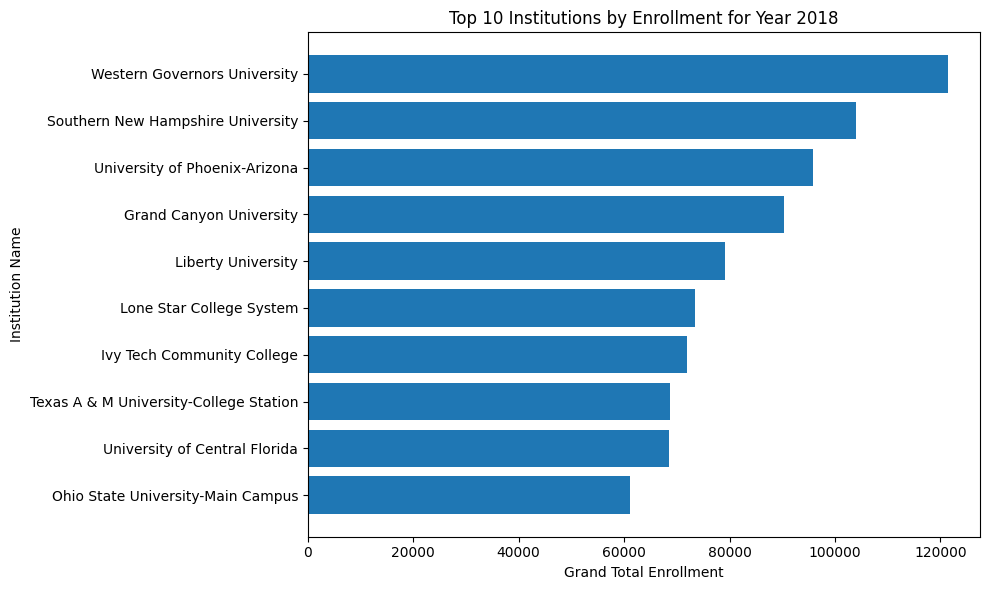

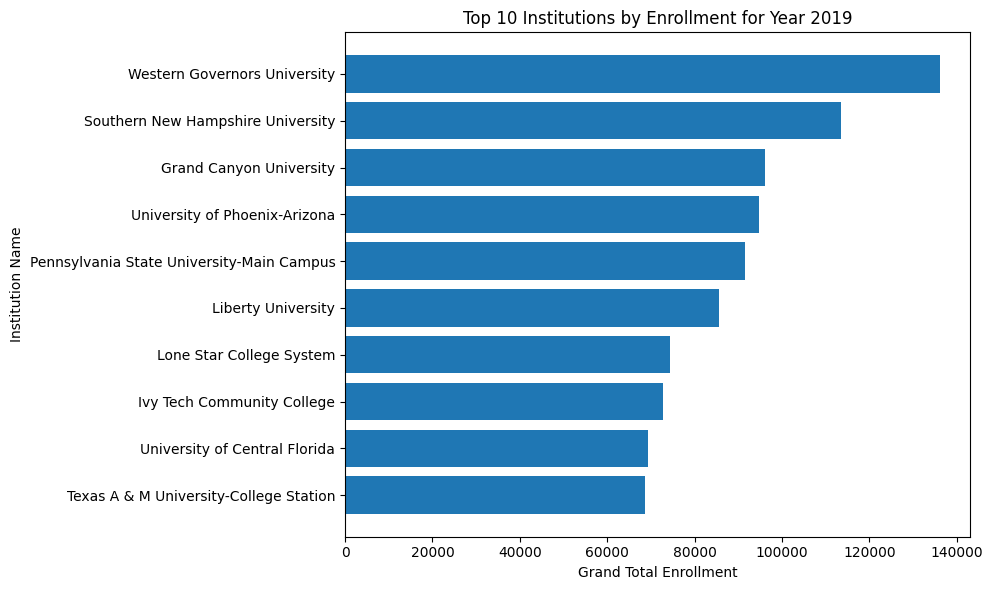

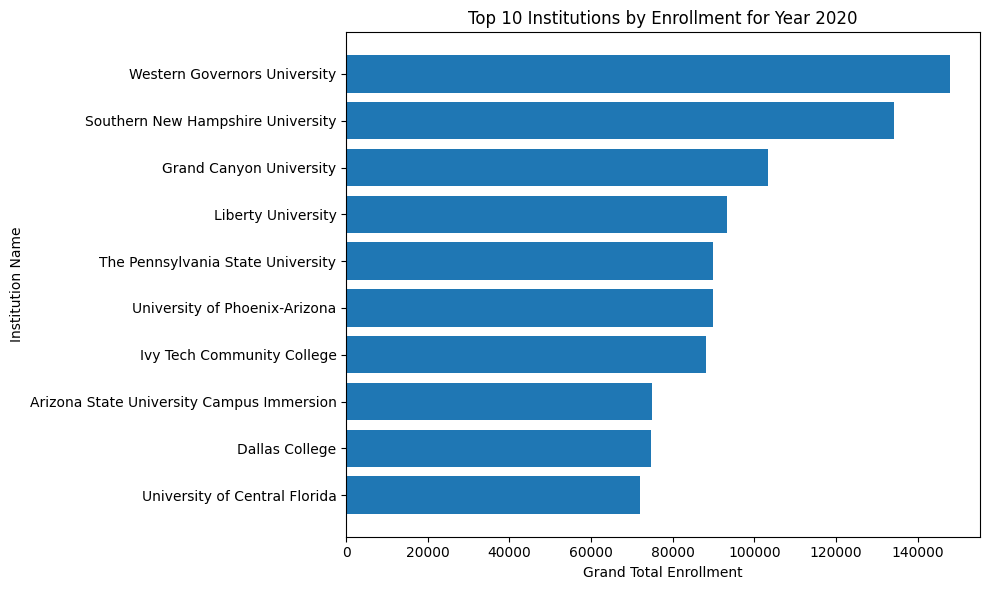

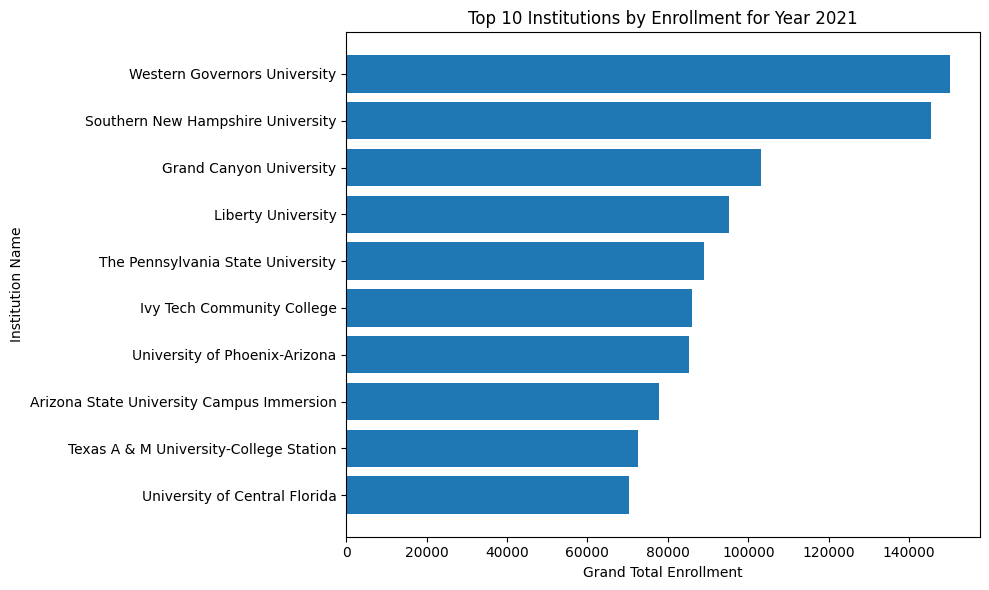

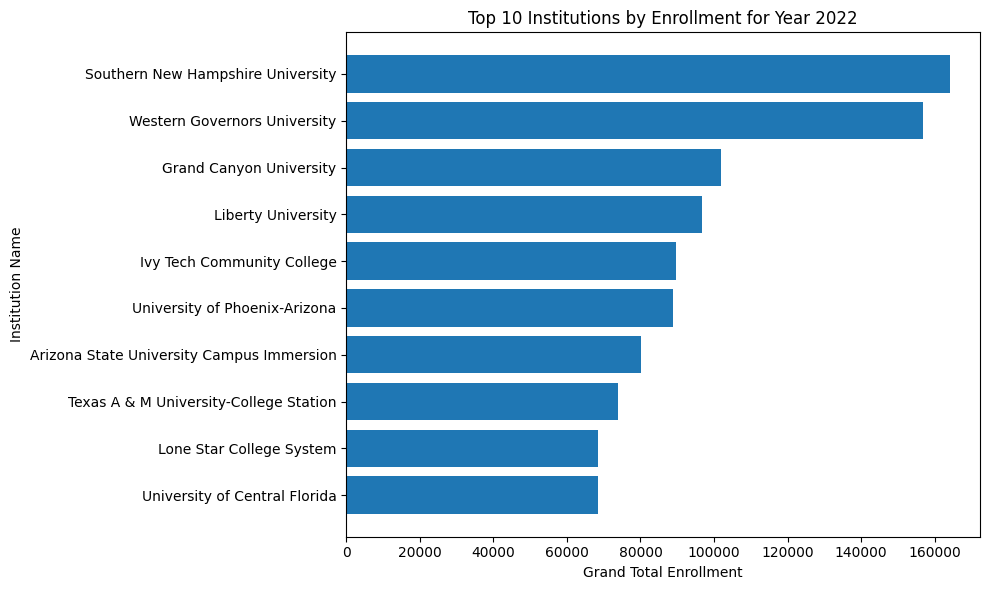

In [11]:
#Plotting top 10 institutions by grand total enrollment for each year
years = enroll3['YEAR'].unique()

for year in years:
    top_10 = enroll3[enroll3['YEAR'] == year].head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_10['INSTNM'], top_10['EFDETOT'])
    plt.xlabel('Grand Total Enrollment')
    plt.ylabel('Institution Name')
    plt.title(f'Top 10 Institutions by Enrollment for Year {year}')
    plt.gca().invert_yaxis()  # Invert y-axis to display top institutions at the top
    plt.tight_layout()
    plt.show()

#What are top 10 institutions grand enrollment by IC Level (eg. 4+ year, 2-4, less than 2 years)by year?

<Figure size 1000x600 with 0 Axes>

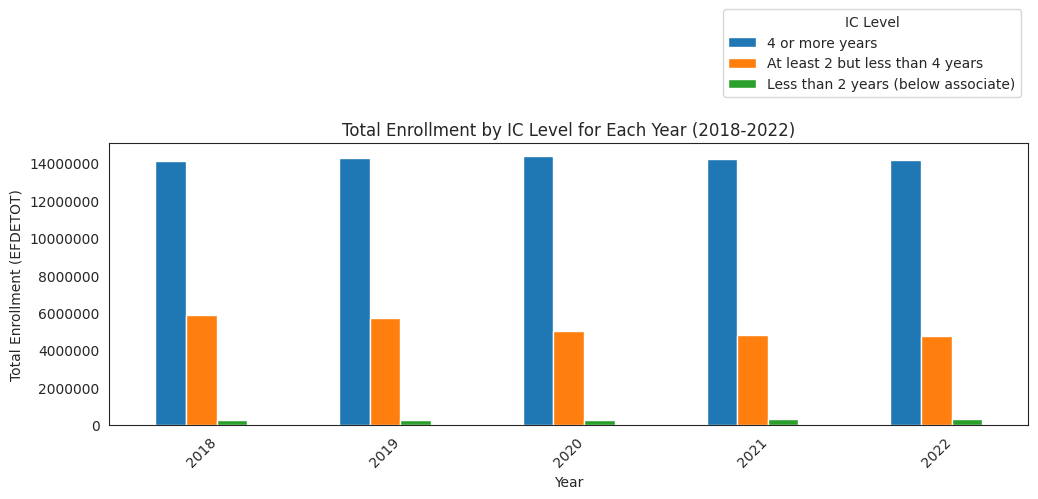

In [38]:
# Filter out enroll2 rows with IC LEVEL equals to -3 (Not available)
filt_ic = enroll2[enroll2['ICLEVEL'] != -3]

# # Select relevant columns
ic_data = filt_ic[['YEAR', 'INSTNM','ICLEVEL', 'EFDETOT', 'EFDEEXC', 'EFDESOM']]



# Define colors for different IC levels
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Plotting
plt.figure(figsize=(10,6))
ax = ic_data.pivot_table(index='YEAR', columns='ICLEVEL', values='EFDETOT', aggfunc='sum').plot(kind='bar', color=colors, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Enrollment (EFDETOT)')
plt.title('Total Enrollment by IC Level for Each Year (2018-2022)')

# Customize legend labels
legend_labels = {
    1: '4 or more years',
    2: 'At least 2 but less than 4 years',
    3: 'Less than 2 years (below associate)'
}

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels.get(ICLEVEL, ICLEVEL) for ICLEVEL in ic_data['ICLEVEL'].unique()], title='IC Level', loc='upper right',bbox_to_anchor=(1, 1.5))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Disable scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

In [39]:
ic_data.describe()

,YEAR,ICLEVEL,EFDETOT,EFDEEXC,EFDESOM
count,30690.000000,30690.000000,30690.000000,30690.000000,30690.000000
mean,2019.971294,1.830596,3216.574356,862.461812,779.535777
std,1.415983,0.839537,7603.438625,4144.686896,2293.773287
min,2018.000000,1.000000,1.000000,0.000000,0.000000
25%,2019.000000,1.000000,116.000000,0.000000,0.000000
50%,2020.000000,2.000000,537.000000,0.000000,8.000000
75%,2021.000000,3.000000,2756.750000,469.000000,595.750000
max,2022.000000,3.000000,164091.000000,157898.000000,55201.000000


#What is enrollment in exclusively DE courses by year?

In [37]:
# Filter out enroll2 rows with IC LEVEL equals to -3 (Not available)
filt_ic = enroll2[enroll2['ICLEVEL'] != -3]

# # Select relevant columns
ic_data_de = filt_ic[['YEAR', 'INSTNM','ICLEVEL', 'EFDETOT', 'EFDEEXC', 'EFEDSOM']]



# Define colors for different IC levels
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Plotting
plt.figure(figsize=(10,6))
ax = ic_data_de.pivot_table(index='YEAR', columns='ICLEVEL', values='EFDEEXC', aggfunc='sum').plot(kind='bar', color=colors, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Enrollment (EFDETOT)')
plt.title('Total Enrollment by IC Level for Each Year (2018-2022)')

# Customize legend labels
legend_labels = {
    1: '4 or more years',
    2: 'At least 2 but less than 4 years',
    3: 'Less than 2 years (below associate)'
}

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels.get(ICLEVEL, ICLEVEL) for ICLEVEL in ic_data_de['ICLEVEL'].unique()], title='IC Level', loc='upper right',bbox_to_anchor=(1, 1.5))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Disable scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

KeyError: "['EFEDSOM'] not in index"

#What are the top 10 institutions with students enrolled only in courses that are considered distance education courses by year?

In [ ]:
#Plotting top 10 institutions by DEEXC for each year
years = grouped_data['YEAR'].unique()

for year in years:
    top_10_de = grouped_data[grouped_data['YEAR'] == year].sort_values(by='EFDEEXC', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_de['INSTNM'], top_10_de['EFDEEXC'], color='orange')
    plt.xlabel('Total Enrollment - only in DE courses ', )
    plt.ylabel('Institution Name')
    plt.title(f'Top 10 Institutions -Students Enrolled only in DE courses for Year {year}')
    plt.gca().invert_yaxis()  # Invert y-axis to display top institutions at the top
    plt.tight_layout()
    plt.show()

#What are the home locations of DE students across years?

In [ ]:
dep.columns

In [ ]:
# Filter relevant columns and drop rows with missing values
# Convert 'Year' column to integer
dep['Year'] = dep['YEAR'].round().astype(int)
# dep['Year']
stu_located = dep[['YEAR', 'EFDEEX1', 'EFDEEX2', 'EFDEEX4']].dropna()

# # Convert 'Year' column to integer
# stu_located['Year'] = stu_located['Year'].astype(int)

# Grouping by year and summing the 'EXE1', 'EXE2', 'EXE4' values
grouped_data = stu_located.groupby('YEAR').sum().reset_index()

# Plotting the totals of EXE1, EXE2, and EXE4 for each year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX1'], label='Exclusive DE enrollment/same state as institution')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX2'], label='Exclusive DE enrollment/out of state')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX4'], label='Exclusive DE enrollment/outside US')

plt.xlabel('YEAR')
plt.ylabel('Total Count')
plt.title('Total of EXE1, EXE2, and EXE4 for All Institutions by Year')
plt.legend()
plt.grid(True)
plt.xticks([2018, 2019, 2020, 2021,2022])
plt.show()

In [ ]:
stu_located.columns

In [ ]:

# Convert 'Year' column to integer
dep['Year'] = dep['YEAR'].round().astype(int)

year_trend = dep[['YEAR', 'EFDETOT', 'EFDEEXC']].dropna()

# Grouping by year and summing the 'EFDETOTAL' and EFDEEXC values
grouped_data = year_trend.groupby('YEAR').sum().reset_index()

# Plotting the total EFDETOTAL by year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDETOT' ], marker='o', linestyle='-', label='EFDETOT')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEXC'], marker='o', linestyle='-', label='EFDEEXC')

plt.xlabel('YEAR')
plt.ylabel('Total Enrollments')
plt.title('Total EFDETOT  by Year-All Institutions')
plt.xticks([2018, 2019, 2020, 2021, 2022])
# Set y-axis tick formatter to display numbers without exponent
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.grid(True)
plt.show()

In [ ]:

# Convert 'Year' column to integer
dep['YEAR'] = dep['YEAR'].round().astype(int)

year_trend = dep[['YEAR', 'EFDEEXC']].dropna()

# Grouping by year and summing the 'EFDETOTAL' and EFDEEXC values
grouped_data = year_trend.groupby('YEAR').sum().reset_index()

# Plotting the total EFDETOTAL by year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEXC' ], marker='o', linestyle='-')

plt.xlabel('YEAR')
plt.ylabel('Total EFDEEXC')
plt.title('Total EFDEEXC by Year-All Institutions')
plt.xticks([2018, 2019, 2020, 2021, 2022])
# Set y-axis tick formatter to display numbers without exponent
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.grid(True)
plt.show()